In [15]:
from IPython.lib.deepreload import original_import
%load_ext autoreload
%autoreload 2

import modular_ex4
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
PADDING = 4
GRAYSCALE = False
BORDER_CUT = 15
ENABLE_ROTATION = False
num_of_blurs = 0

garden_video = "Garden.mp4"
house_video = "House.mp4"
kessaria_video = "Kessaria.mp4"
boat_video = "boat.mp4"
Shinkansen_video = "Shinkansen.mp4"
waterfalls_video = "Iguazu.mp4"

# 0. Load video & blur
cur_video = boat_video
raw_frames = modular_ex4.load_video_frames(cur_video, spatial_downscale=1)
for _ in range(num_of_blurs):
    raw_frames = modular_ex4.blur_video(raw_frames, modular_ex4.REDUCE_KERNEL)

In [17]:
# 1. & Compute Motion
motion_data = modular_ex4.compute_motion(raw_frames, BORDER_CUT)

In [18]:
# invert if motion is right-to-left
if modular_ex4.estimate_motion_dir(motion_data) == "RTL":
    raw_frames = raw_frames[::-1]
    motion_data = [(-u, -v, -theta) for u, v, theta in motion_data[::-1]]

Left-to-Right motion detected.


In [19]:
# 2. Stabilize Video
stable_frames = modular_ex4.stabilize_video(raw_frames, motion_data, enable_rotation=ENABLE_ROTATION)

In [20]:
# 3. Compute Path for motion composition: align all frames to same coordinate system
stabilized_motion = [(u, 0, 0) for u, v, theta in motion_data]
transforms = modular_ex4.compute_camera_path(stabilized_motion)

In [21]:
geo = modular_ex4.compute_canvas_geometry(transforms, raw_frames.shape[1], raw_frames.shape[2])

In [22]:
# 4. Create Movie of Multi-Perspective mosaics
movie_frames = modular_ex4.dynamic_mosaic(stable_frames, transforms, geo, back_n_forth=True, num_views=20)

Creating panorama for anchor 0.20...
Creating panorama for anchor 0.23...
Creating panorama for anchor 0.26...
Creating panorama for anchor 0.29...
Creating panorama for anchor 0.33...
Creating panorama for anchor 0.36...
Creating panorama for anchor 0.39...
Creating panorama for anchor 0.42...
Creating panorama for anchor 0.45...
Creating panorama for anchor 0.48...
Creating panorama for anchor 0.52...
Creating panorama for anchor 0.55...
Creating panorama for anchor 0.58...
Creating panorama for anchor 0.61...
Creating panorama for anchor 0.64...
Creating panorama for anchor 0.67...
Creating panorama for anchor 0.71...
Creating panorama for anchor 0.74...
Creating panorama for anchor 0.77...
Creating panorama for anchor 0.80...


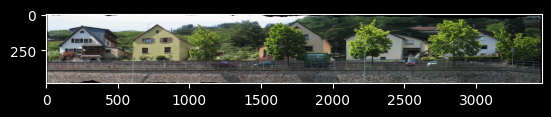

In [23]:
plt.imshow(movie_frames[0])

In [24]:
import imageio

imageio.mimsave(f"outputs/movies/{cur_video[:-4]}_movie.mp4", movie_frames, fps=10)
print(f"{cur_video[:-4]} Movie saved!")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (3461, 480) to (3472, 480) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


boat Movie saved!


### for debugging: render 3 panoramas with different anchors and show them

In [25]:
# 3. Render
panorama_left = modular_ex4.render_strip_panorama(stable_frames, transforms,
                                                  geo, strip_anchor=0.2,
                                                  strip_padding=PADDING,
                                                  grayscale_out=GRAYSCALE)
print("Panorama Left Anchor 0.2 done.")
panorama_mid = modular_ex4.render_strip_panorama(stable_frames, transforms,
                                                 geo, strip_anchor=0.5,
                                                 strip_padding=PADDING,
                                                 grayscale_out=GRAYSCALE)
print("Panorama Mid Anchor 0.5 done.")
panorama_right = modular_ex4.render_strip_panorama(stable_frames, transforms,
                                                   geo, strip_anchor=0.8,
                                                   strip_padding=PADDING,
                                                   grayscale_out=GRAYSCALE)
print("Panorama Right Anchor 0.8 done.")
print(">>> done.")

Panorama Left Anchor 0.2 done.
Panorama Mid Anchor 0.5 done.
Panorama Right Anchor 0.8 done.
>>> done.


initializing plot...


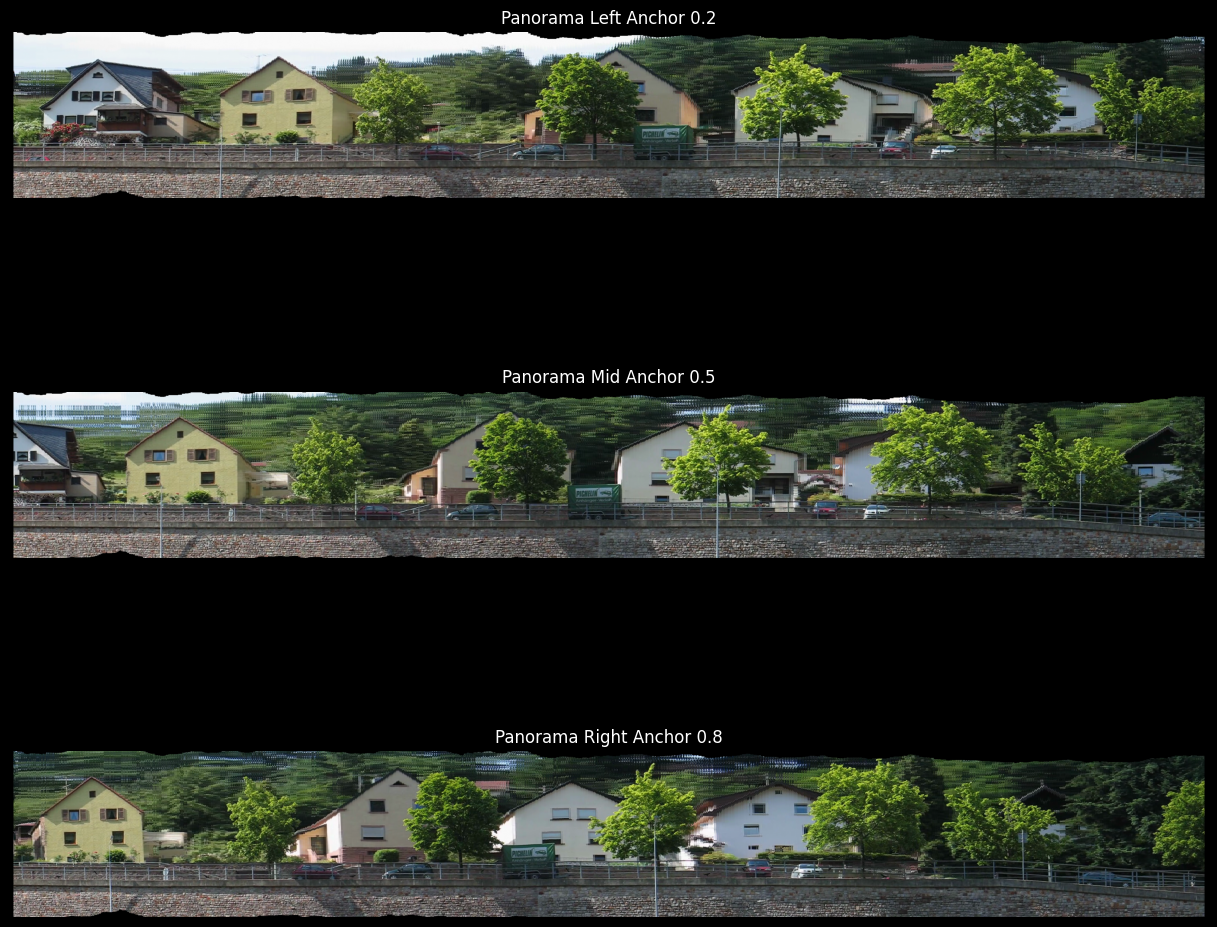

plot done.


In [26]:
# show all 3 panoramas one line below the other
# with tight layout, no vertical padding between lines
print("initializing plot...")
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.imshow(panorama_left)
plt.title("Panorama Left Anchor 0.2")
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(panorama_mid)
plt.title("Panorama Mid Anchor 0.5")
plt.axis('off')
plt.subplot(3, 1, 3)
plt.imshow(panorama_right)
plt.title("Panorama Right Anchor 0.8")
plt.axis('off')
plt.tight_layout(pad=0.1)
plt.show()
print("plot done.")